## <a class="anchor" id="link1">Problem 1: Home Court Advantage</a> 🏡
In this notebook, I use the cleaned version of data to perform an exploratory data analysis (EDA) on data scraped from the AUDL website. 

**Problem Statement**
*Does playing on your home field give an advantage, and if so, how much?*
- It's a well-known phenomenon in any sport that playing on your home field tends to offer an advantage. This could be because you practice there, or maybe you know the fans and they give a boost. Fans of ultimae in particular are a big part of the game and can be a huge deciding factor in the energy levels of the teams on the field. For this problem, I'll assess game scores for all AUDL season and try to assess what kind of advantages playing at home can have.

## Table of Contents
1. [Data Import and Overview](#link0)
1. [Problem 1: Home Court Advantage 🏡](#link1)
    - a. [Univariate EDA Summary](#link2)
    - b. [Multivariate EDA Summary](#link3)
    - c. [Team Scoring Factors](#link4)
    - d. [Hypothesis Testing](#link5)
    - e. [Conclusions and Recommendations](#link6)
2. [Resources](#linkR)

## <a class="anchor" id="link0">Data Import and Overview</a> 🏡

In [1]:
# IMPORTS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [2]:
# Import and sample data
DATA_PATH = "DATA\\postproc\\all_games_stats.csv"
df: pd.DataFrame = pd.read_csv(DATA_PATH)
df.head()

,team,turnovers,blocks,home_team,home_score,away_team,away_score,completions,total_passes,o_line_scores,...,o_line_posessions,d_line_scores,d_line_points,d_line_posessions,rz_scores,rz_posessions,huck_completions,huck_attempts,season,is_home_team
0,Spiders,23,10,TOR,18,SJ,28,234,257,17,...,28,11,30,23,NaN,NaN,NaN,NaN,2014,False
1,Rush,22,19,TOR,31,NY,16,270,292,16,...,25,15,33,30,NaN,NaN,NaN,NaN,2014,True
2,Empire,37,12,TOR,31,NY,16,213,250,15,...,47,1,18,8,NaN,NaN,NaN,NaN,2014,False
3,Spiders,19,10,SJ,23,MAD,20,272,291,16,...,28,7,25,15,NaN,NaN,NaN,NaN,2014,True
4,Radicals,21,16,SJ,23,MAD,20,265,286,15,...,33,5,22,12,NaN,NaN,NaN,NaN,2014,False


In [3]:
# Null Data and DTypes Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team               2238 non-null   object 
 1   turnovers          2238 non-null   int64  
 2   blocks             2238 non-null   int64  
 3   home_team          2238 non-null   object 
 4   home_score         2238 non-null   int64  
 5   away_team          2238 non-null   object 
 6   away_score         2238 non-null   int64  
 7   completions        2238 non-null   int64  
 8   total_passes       2238 non-null   int64  
 9   o_line_scores      2238 non-null   int64  
 10  o_line_points      2238 non-null   int64  
 11  o_line_posessions  2238 non-null   int64  
 12  d_line_scores      2238 non-null   int64  
 13  d_line_points      2238 non-null   int64  
 14  d_line_posessions  2238 non-null   int64  
 15  rz_scores          268 non-null    float64
 16  rz_posessions      268 n

## Univariate Analysis

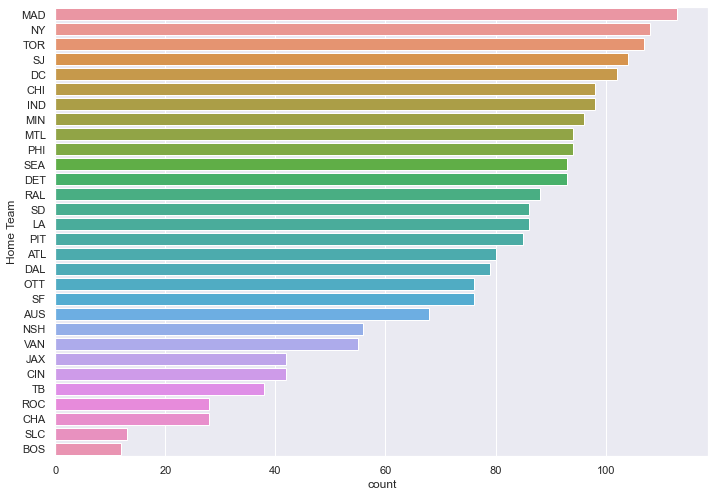

In [5]:
# Count of Home Team 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=df, 
              y='home_team',
              order = df['home_team'].value_counts().index)
plt.ylabel('Home Team')
plt.show()


<AxesSubplot:>

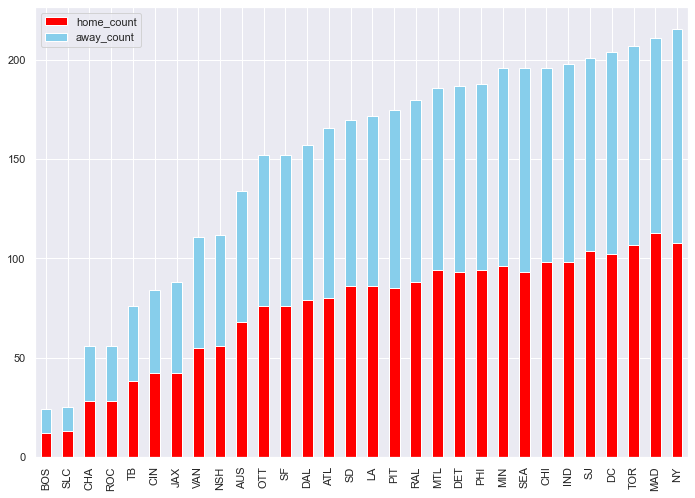

In [6]:
# Create a df for stacked total games
indx = df['home_team'].unique()
home_count = [df[df['home_team'] == i].shape[0] for i in indx]
away_count = [df[df['away_team'] == i].shape[0] for i in indx]
total_games_df = pd.DataFrame(index=indx, data={'home_count': home_count,
                                                'away_count': away_count})

total_games_df['total_games'] = total_games_df['home_count'] + total_games_df['away_count']
total_games_df.sort_values(by='total_games', inplace=True)
total_games_df.drop(labels='total_games', axis=1, inplace=True)

total_games_df.plot(kind='bar', 
                    stacked=True, 
                    color=['red', 'skyblue']
                    )

<AxesSubplot:xlabel='home_score', ylabel='home_team'>

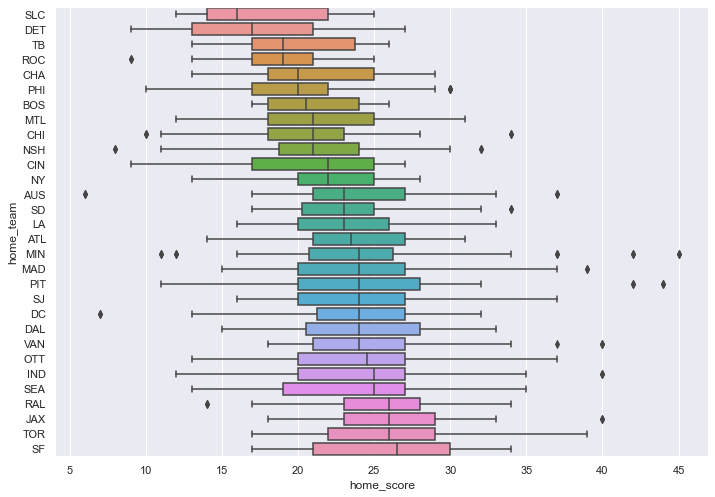

In [7]:
# Home and Away Scores
sort = df.groupby(by='home_team').median().sort_values(by='home_score').index
sns.boxplot(data=df, x='home_score', y='home_team', order=sort)

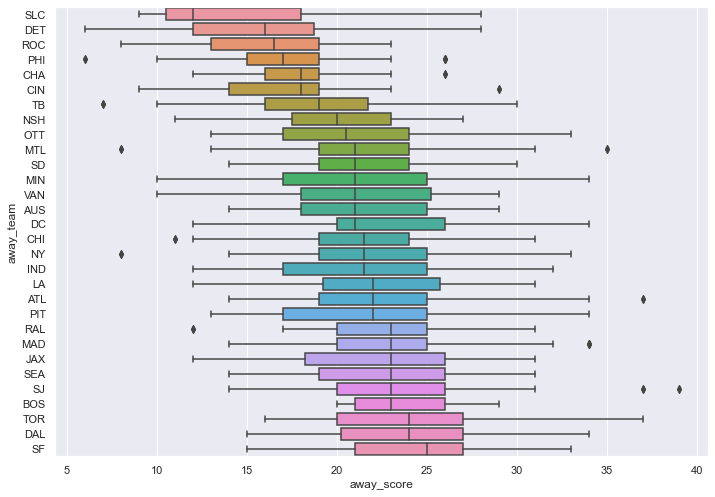

In [8]:
sort = df.groupby(by='away_team').median().sort_values(by='away_score').index
sns.boxplot(data=df, x='away_score', y='away_team', order=sort);

Text(0.5, 0, 'Score')

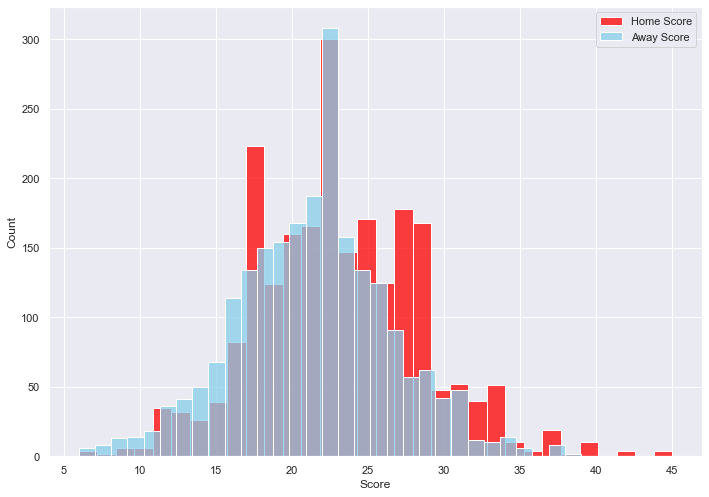

In [9]:
# Histograms of Scores
sns.histplot(data=df, x='home_score', color='red')
sns.histplot(data=df, x='away_score', color='skyblue')
plt.legend(['Home Score', 'Away Score'])
plt.xlabel('Score')

Text(0.5, 0, 'Scores')

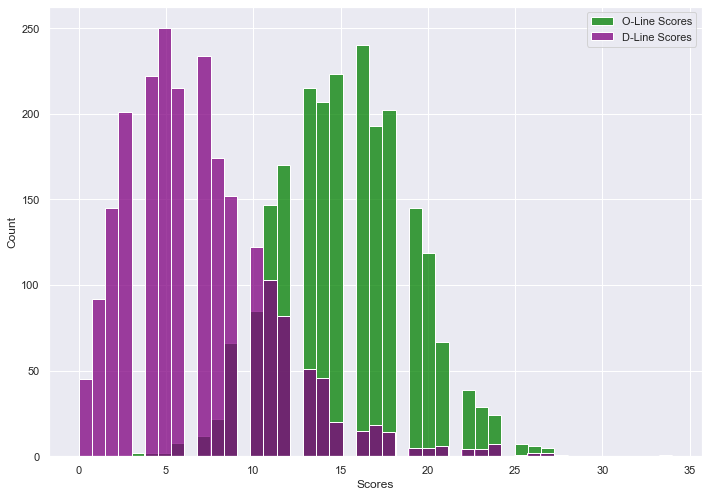

In [10]:
# Histograms of Scores
sns.histplot(data=df, x='o_line_scores', color='green')
sns.histplot(data=df, x='d_line_scores', color='purple')
plt.legend(['O-Line Scores', 'D-Line Scores']);
plt.xlabel('Scores')

Text(0.5, 0, 'Posessions')

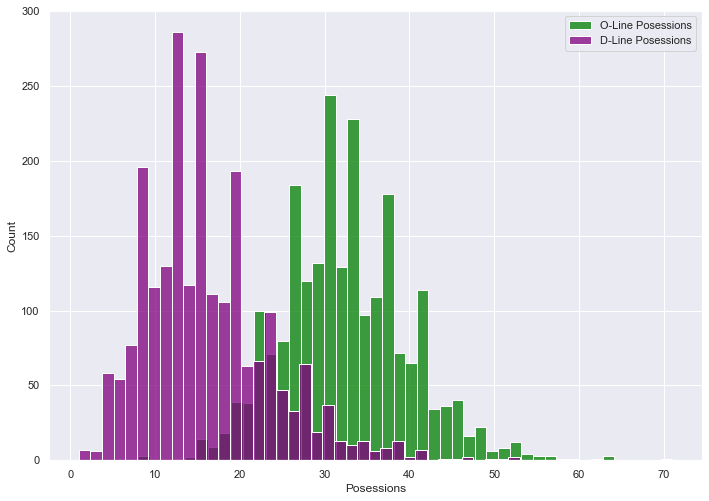

In [11]:
sns.histplot(data=df, x='o_line_posessions', color='green')
sns.histplot(data=df, x='d_line_posessions', color='purple')
plt.legend(['O-Line Posessions', 'D-Line Posessions'])
plt.xlabel('Posessions')

### <a class="anchor" id="link2">P1 - Univariate Summary</a>
- Dataset is heavily biased towards teams that have been in the league longer as well as towards offensive scores. Teams like NY, San Jose, DC, Toronto, and Madison have been in the league since the 2nd season. These teams have had many more chances to play games. Additionally, of these five teams, four have won at least one championship meaning they've participated in championship weekends which occur outside of the regular season
- SLC is by far the worst performing team, taking the lowest median score in both home and away games. The lowest scoring home teams in most cases are also the lowest scoring away teams.
- There are, however, some rare teams that perform nominally better in certain situations:
    - Boston is one such team, sporting a median score of 21 goals when playing at home. They are tied for 6th place as the lowest scoring team for home games. Alternatively, their median score while away from home is 23 goals, tying them for 3rd place in terms of goals scored away from home.
    - Other teams such as Chicago and Indiana also apear to perform better while away. Certain weather-related factors could affect this. If your home stadium is cold for even part of the season, it could affect how well you play.
- The top two consistent scorers are the San Francisco Flamethrowers and the Toronto Rush

## Multivariate Analysis

<AxesSubplot:>

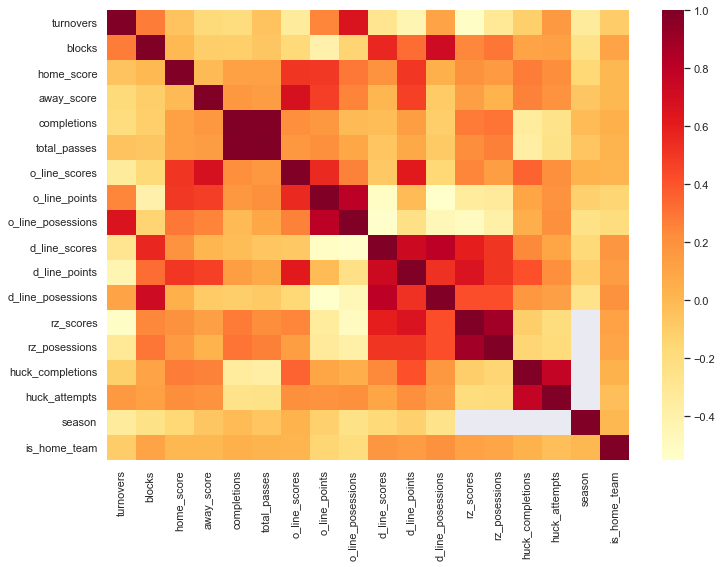

In [12]:
# Correlation Matrix
corr_df = df.corr()
sns.heatmap(corr_df, cmap='YlOrRd')

<AxesSubplot:xlabel='season', ylabel='score'>

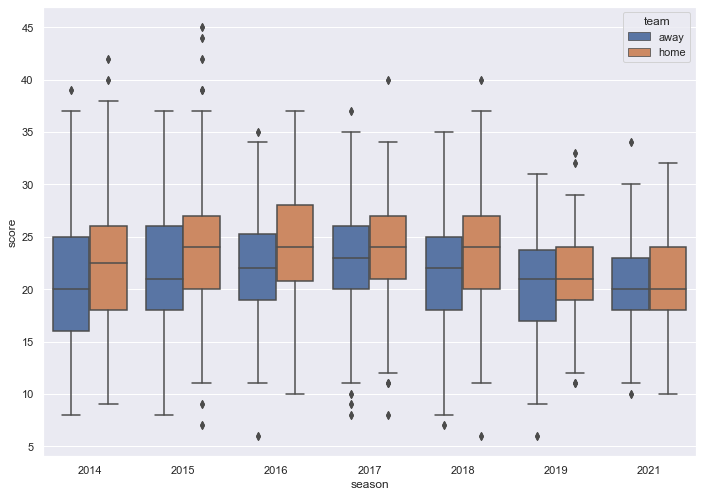

In [13]:
# Get Season, home score, and away score into separate lists to compare using a boxplot
seasons = [i for i in df['season']]
away_scores = [i for i in df['away_score']]
home_scores = [i for i in df['home_score']]

temp_df = pd.DataFrame({
    'season': seasons*2,
    'score': away_scores + home_scores,
    'team': ['away']*len(seasons) + ['home']*len(seasons)
})

sns.boxplot(data=temp_df, x='season', y='score', hue='team')

Text(0.5, 1.0, 'Home v. Away Score Average by Season')

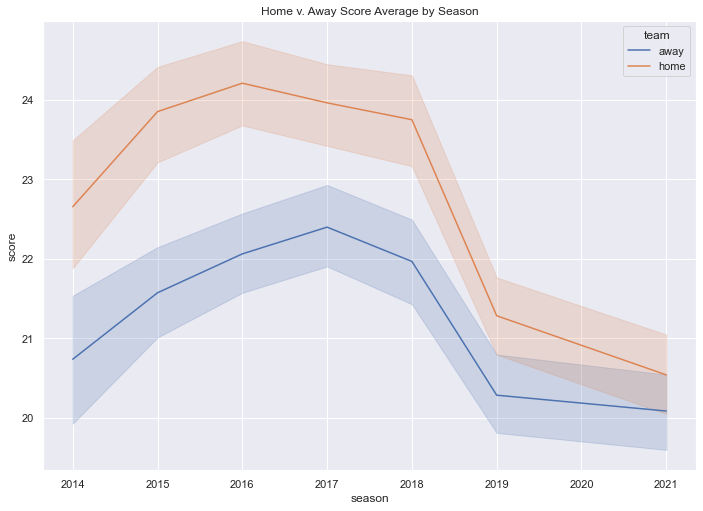

In [14]:
sns.lineplot(data=temp_df, x='season', y='score', hue='team')
plt.title("Home v. Away Score Average by Season")

In [15]:
# Calculation for Margin of Victory and Apply to each game
def calculate_margin_of_victory(x: int, y: int) -> float:
    return((max(x,y) - min(x,y)) / sum([x,y]))

df['victory_margin'] = pd.NA
for i in df.index:
    a = df.at[i, 'home_score']
    b = df.at[i, 'away_score']
    df.at[i, 'victory_margin'] = calculate_margin_of_victory(a, b)

Text(0.5, 1.0, 'Margin of Victory by Season')

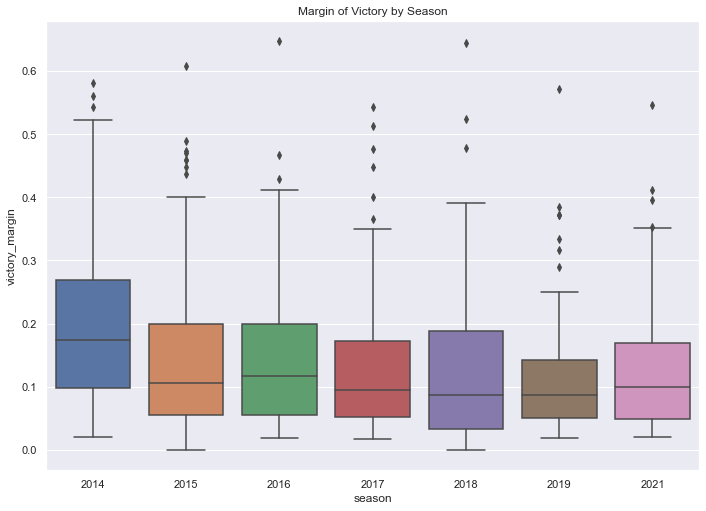

In [16]:
# Margin of Victory
sns.boxplot(data=df[df['is_home_team'] == True], x='season', y='victory_margin')
plt.title("Margin of Victory by Season")

In [17]:
# Assign a column indicating the winning team
def winning_team(x):
    if x['home_score'] > x['away_score']:
        return 'home'
    return 'away'

df['winning_team'] = pd.NA

for ind in df.index:
    h_score = df.at[ind, 'home_score']
    a_score = df.at[ind, 'away_score']

    if h_score > a_score:
        df.at[ind, 'winning_team'] = 'home'
    
    if a_score > h_score:
        df.at[ind, 'winning_team'] = 'away'


<AxesSubplot:xlabel='season', ylabel='victory_margin'>

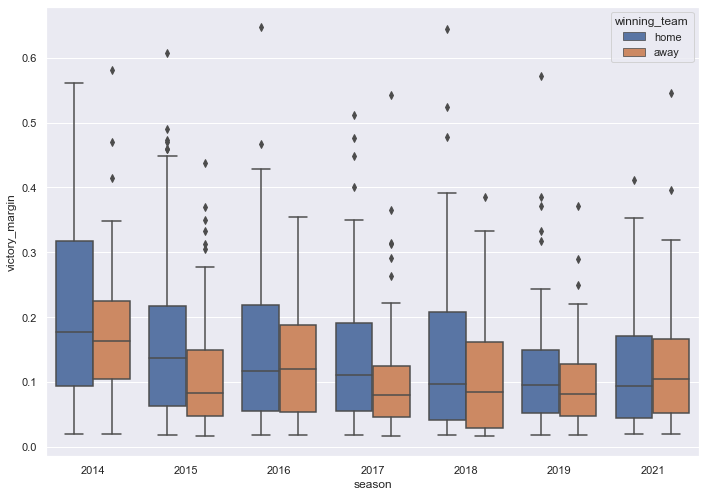

In [18]:
# Victory Margin by Away wins v. Home Wins
sns.boxplot(data=df[df['is_home_team']==True],
                    x='season', y='victory_margin', hue='winning_team')

### <a class="anchor" id="link3">P1 - Multivariate Summary</a>
**Correlation Matrix**
- As expected there is significant correlation between several pairs of attributes. Notably total passes v. completions, away score v. o-line points, and blocks v. d-line posessions.
    - Completion percentage as a whole likely does not drop below 90% for any team, so total passes should correlate heavily with the number of completions.
    - Excluding halftime (sometimes) and the end of the game, every away score should be followed by an o-line point, so these two have a near one-to-one correlation.
    - Finally, the more chances you give great players, the more great plays they're going to make.
- Given this analysis is looking at effect of playing at home, it's important to note which which attributes show some correlation (either positively or negatively) with 'home_score' and 'away_score'.
    - 'home_score' most strongly correlates with 'o_line_scores', 'o_line_points', 'd_line_score', and 'd_line_points'
- There also seems to be some significant correlation with d-line scores, points, and posessions, and red zone numbers.
- Note: The gray areas seen related to season correlation with huck stats and red zone stats appears that way because the redzone numbers and huck stats have only been collected for one season, therefore no correlation could be determined.

**Box Plot**
- For all seasons except the last two, the median scores of the home and away teams have been largely different. As the league has grown and matured, however, that gap has closed. So much so that the median score for the last two seasons has been equal for home and away teams at 21 goals in 2019 and 20 goals in 2021.

**Line Plot**
- When looking at mean values, There is a better indication of the home-court advantage. The 2015 season was particularly noticeable for having a significant difference between home and away scores. There is also a notable drop in the home-away difference, as well as average score in the 2019 season. [this article](https://theaudl.com/league/news/2019-audl-closer-ever-competition) gives one plausible explanation as to why that may have happened:


>Perhaps the most tactical explanation for tighter games in 2019 stems from a subtle rule change introduced this year. Rule 5.2.3 permits the clock to start when a pull is released, unless “there are 60 seconds or less remaining in any quarter or overtime period at the time of the pull.” Though said change may not be noticeable to the casual viewer, its impact can compound over the course of a game.

**Margin of Victory**
- The victory margin is calculated as the final score delta over the total number of points scored by both teams. For a final score of 20 to 18, the victory margin is (20-18) / (20+18) = 2/38 = 5.26%. A higher margin of victory indicates a higher outscoring ability.
- There is some truth in what the above article is saying. From the above boxplot showing changes in margin of victory over the years, 2019 by far had some of the closest games (i.e. smallest margins of victory). It's difficult to make any conclusions as to whether or not games will continue to be close, but the 2022 season is scheduled to start soon and is bound to bring more information and stats to analyze.
- When looking at home wins v. away wins, the 2016 and 2021 seasons were the only two where, in the cases where the away team won, they tended to win by a larger margin of victory than when home teams won. For all seasons, the range of margins of victory seen by the home team were significantly larger than the ranges seen by away teams.

## <a class="anchor" id="link4">Team Scoring Factors</a>
The below graphs compare teams and their scoring capabilities over the last three seasons. Each team is attributed a *Home Factor*, an *Away Factor*, and a *Total Factor* based on how many points the team is expected to score over the other team in the respective game settings. The last 3 seasons are selected because teams have temendous ability to evolve and grow over time. Looking at the past 3 seasons gives a much more accurate representation of where each team is performing today.

In [19]:
temp_df = df[df['season'] > 2017].copy(deep=True)

temp_df['home_diff'] = temp_df['home_score'] - temp_df['away_score']
temp_df['away_diff'] = temp_df['away_score'] - temp_df['home_score']

teams = temp_df['home_team'].unique()
home_factor = [temp_df[temp_df['home_team'] == i]['home_diff'].mean() for i in teams]
away_factor = [temp_df[temp_df['away_team'] == i]['away_diff'].mean() for i in teams]

num_home_games = [len(temp_df[temp_df['home_team'] == i]) for i in teams]
num_away_games = [len(temp_df[temp_df['away_team'] == i]) for i in teams]

total_factor = []
for i in range(len(teams)):
    factor = (num_home_games[i]*home_factor[i] + num_away_games[i]*away_factor[i])
    factor = round(factor / (num_home_games[i] + num_away_games[i]),3)
    total_factor.append(factor)

factor_df = pd.DataFrame({
    'teams': teams,
    'home_factor': home_factor,
    'away_factor': away_factor,
    'total_factor': total_factor,
})

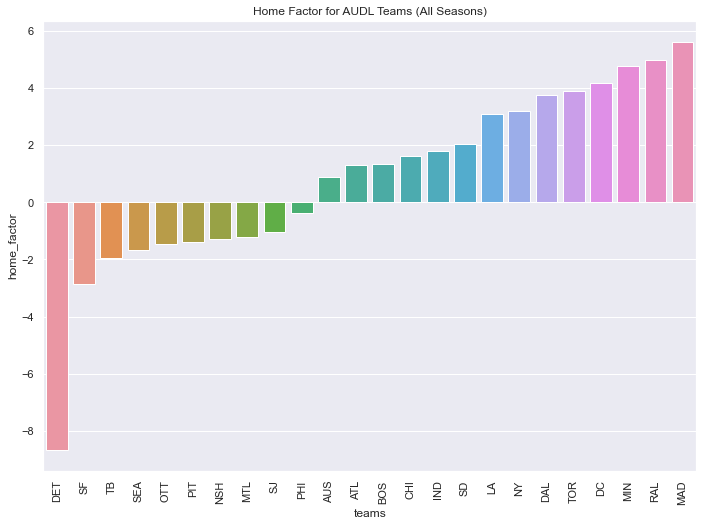

In [20]:
sort_list = factor_df.sort_values(by='home_factor').teams
sns.barplot(data=factor_df, x='teams', y='home_factor', order=sort_list)
plt.title('Home Factor for AUDL Teams (All Seasons)')
plt.xticks(rotation=90);

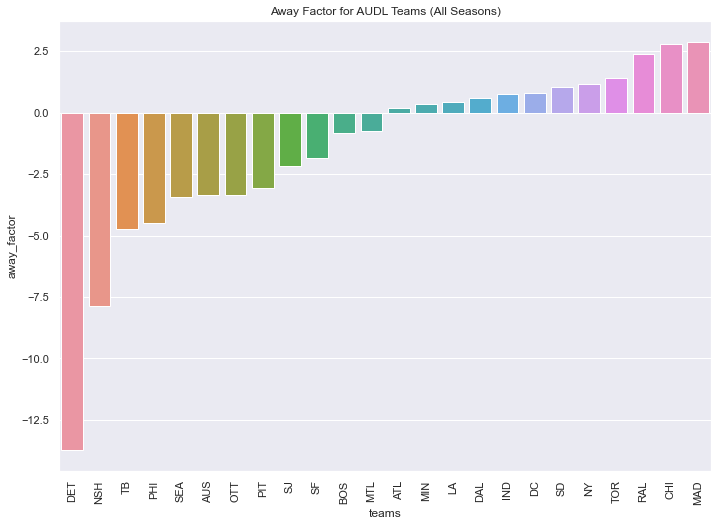

In [21]:
sort_list = factor_df.sort_values(by='away_factor').teams
sns.barplot(data=factor_df, x='teams', y='away_factor', order=sort_list)
plt.title('Away Factor for AUDL Teams (All Seasons)')
plt.xticks(rotation=90);

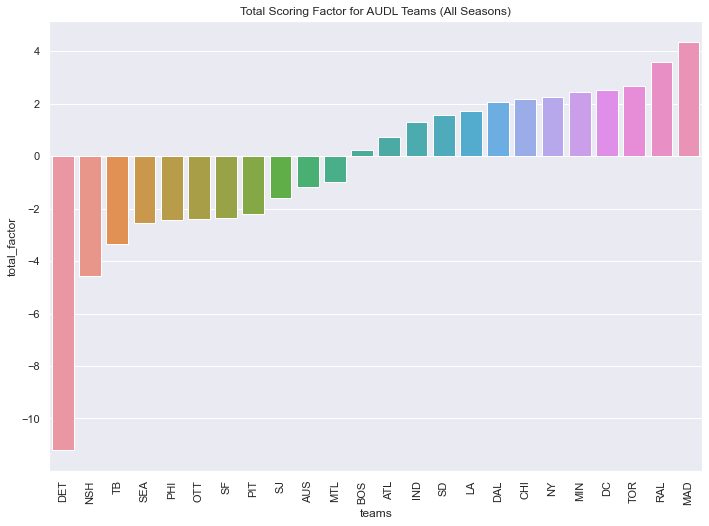

In [22]:
sort_list = factor_df.sort_values(by='total_factor').teams
sns.barplot(data=factor_df, x='teams', y='total_factor', order=sort_list)
plt.title('Total Scoring Factor for AUDL Teams (All Seasons)')
plt.xticks(rotation=90);

## <a class="anchor" id="link5">Hypothesis Testing</a>
To address this problem, I will take a random sample of members from smokers and non-smokers and use these samples to perform a **2-Sample Independent T-test** to determine if they are different. Below are our null and alternative hypotheses.
$$
H_0 : \mu_h <= \mu_a\\
H_a : \mu_h > \mu_a
$$
where $\mu_h$ = The average home score,
and $\mu_a$ = The average away score\\

For this study, I'll use a level of significance = 0.05

To determine what test to use, I'll calculate the standar deviation of both sets of scores.

In [23]:
home_sample = df['home_score'].sample(500, random_state=92)
away_sample = df['away_score'].sample(500, random_state=92)

print(f"The mean home scores is {home_sample.mean()}")
print(f"The mean away scores is {away_sample.mean()}")

print(f"The standard deviation of home scores is {home_sample.std()}")
print(f"The standard deviation of away scores is {away_sample.std()}")

The mean home scores is 22.85
The mean away scores is 21.716
The standard deviation of home scores is 5.595902809780833
The standard deviation of away scores is 5.10288377740385


Let's test whether the T-test assumptions are satisfied or not:
- Continuous data - Yes, the scores are continuous
- Normally distributed populations - Yes, from the double-histogram graph above we can see both home and away scores are roughly normally distributed
- Independent populations - Samples are considered independent given each team has multiple chances to play at home and away
- Equal population standard deviations - The sample standard deviations are very close to each other.
- Random sampling from the population - Yes, samples are random.
Voila! We can use two sample T-test for this problem.

In [24]:
# IMPORTS
from scipy import stats
from scipy.stats import ttest_ind

In [25]:
# find the p-value
test_stat, p_value = ttest_ind(home_sample, away_sample, equal_var = True, alternative = 'greater')
print('The p-value is ' + str(p_value))

The p-value is 0.00042181471998928137


As the p-value(~0.0004) is much smaller than the level of significance, we can fully reject the null hypothesis. Hence, we clearly have enough significance to conclude that there is a difference between playing at home and playing away at 0.05 significance level.

But does this hold for every season? Below I look at the p-value by season to see how the influence of playing at home has changed based on the statistical test.

In [26]:
# P-Value by Season
for s in df['season'].unique():
    temp_df = df[df['season'] == s]
    home_sample = temp_df['home_score'].sample(150, random_state=92)
    away_sample = temp_df['away_score'].sample(150, random_state=92)

    test_stat, p_value = ttest_ind(home_sample, away_sample, equal_var = True, alternative = 'greater')
    print(f'{s}: The p-value is ' + str(round(p_value, 4)))

2014: The p-value is 0.0167
2015: The p-value is 0.0002
2016: The p-value is 0.0029
2017: The p-value is 0.0023
2018: The p-value is 0.0053
2019: The p-value is 0.0132
2021: The p-value is 0.0816


In all cases except the 2021 season, we can say with some certainty that there is indeed an advantage to playing at home versus playing away. The p-value for the 2021 season (~0.08) is too high to reject our null hypothesis at the decided significance. These results seem to echo what has been previously established: 
- The median scores for 2019 and 2021 seasons were the same for home and away teams which indicates these seasons would be the closest in terms of score. The tests for these two seasons also have the highest significance.
- 2019 had the lowest overall victory margin of all seasons. Similarly, the t-test for this season was the 3rd highest behind 2014 and 2021.
- The relatively high p-value for the 2014 season indicates it was likely a close season.
- The high p-value for the 2021 season indicates there was not enough evidence to reject the null hypothesis and say that playing at home gave an advantage in 2021. In fact, the final boxplot graph above shows that away teams had a slightly higher margin of victory during this season.

## <a class="anchor" id="link6">Conclusions</a>
**Is there an advantage to playing at home versus away?**
- Based on all of the evidence above, it is clear that there is something special and influential for a team to play in their home city and on their home turf. On average, home teams score ~23.07 goals per game compared to roughly 21.42 goals for away teams. But the nuance is different for each team and each season.
- Although the home-field advantage was clear for the first few seasons of the AUDL, it appears to be disappearing. So much so that away teams began to show some domination in the 2021 season. This is in part due to rule changes, but also could speak to improvements in coaching methods and player mentality on the field. </br>

**What does this say about competition and playing in the AUDL?**
- Scores are all relative. The final graphs above show each team and how they compare to others when playing home v. away. If you are a team that does not perform as well in either category, you can look into the stats of those games to identify what game characteristics are causing you to not play as well at home.
- A 'Home Factor' of 0 for a team indicates the average score between that team and their opponent when playing at home is 0. The higher the 'Home Factor', the better that team tends to play at home. Of the 30 teams, 20 have a positive home factor.
- The 'Total Factor' is calculated across all games and indicates the teams estimated point differential against all other opponents. The maximum 'Total Factor' value is just above 5 while the lowest is nearly -15. This indicates that even the best of teams will win by a few goals, but the teams that often lose, tend to lose by a lot.

**How can teams use this information to make decisions?**
- The above analysis provides a baseline for identifying where to start. For Team X, if they aren't performing as well as they would like to be, they should compare their numbers above with those of other teams in their division. In particular, the home and away factors should show Team X who is dominating in their region.
- Having a better home/away factor can come down to the final minutes and seconds of each quarter or game. Teams should be practicing going to the final whistle and trying to squeeze out every opportunity the clock has to offer. Emphasizing 2-minute drills in practice can help players develop the mindset of not stopping until the clock stops.
- This analysis is just about scores, but scores are the trailing indicator of so many different aspects of the game. If you're the worst performer in your region, you can look at the next best team in the region and assess how they play differently from you. Identify which games were your biggest losses, what caused such big losses, and where the team strategy broke down.
- There are several new teams in the 2021 season: Portland Nitro, Salt Lake Shred, and Colorado Summit. If you're a new team, looking to make a name for yourself in the region (namely the West region for these teams), you should look to see who the "Big Fish" are in your region (San Diego and Los Angeles for the West). Look to outperform them against other Western Division teams.


### Data Limitations:
- The data is not representative of any given teams standing in the league. This is because the teams in the AUDL do not play every other team over the course of the season. Teams are often scheduled to play other teams in their division with only a few cross-divison games happening in each season. Because of this, the numbers shown in the above analysis are indicative of how each team plays in their region, but not how they would play against all AUDL teams.
- When looking at overall numbers, data is heavily skewed towards top performing teams like Madison and New York who have been in the league since the beginning or near the beginning. These teams have accumulated more games and therefore have a bigger influence over numbers when looking at the league as a whole.
- Some games (very few) may be neither away games nor home games. Games played in the championship series may take place outside of either competitors home arena. Though these cases exist, they make up a very small portion of the total games. For future studies, these should be identified and removed.
- The home and away team for each row were assumed by parsing the raw data downloaded from the AUDL website where games are listed as "RAL 19 - 16 NY". In these cases, the first team listed is assumed to be the away team. This was partially verified by looking at a small sample of random games.
- Finally, this study only looks at teams as a whole. In further analysis, I could also look at individual players and try to assess how they play differently when home v. away.

---------------------------
# <a class="anchor" id="linkR">Resources</a>
---------------------------
1. [The AUDL Website](https://theaudl.com/)
2. ['AUDL 2019: Closer than Ever'](https://theaudl.com/league/news/2019-audl-closer-ever-competition)
3. ['AUDL Announces 2022 Schedule, Championship Weekend Back in Madison](https://ultiworld.com/2022/02/21/audl-announces-2022-schedule-championship-weekend-back-in-madison/#:~:text=Along%20with%20the%20return%20of,Lake%20Shred%2C%20and%20Colorado%20Summit)